## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [19]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [20]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [21]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [22]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [23]:
df['converted'].sum()/df.user_id.nunique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [24]:
treatment_old = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
control_new = df.query("group == 'control' and landing_page == 'new_page'").shape[0]

treatment_old + control_new

3893

f. Do any of the rows have missing values?

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [26]:
#I removed the rows where group and landing page where not aligned properly:
df2 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')]
df2 = df2.append(df[(df.group == 'control') & (df.landing_page == 'old_page')])

In [27]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [28]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [29]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [30]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [31]:
#I decided to drop the first row that was duplicated:
df2.drop(1899)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [32]:
df2['converted'].sum()/df2.user_id.nunique()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [33]:
df2.query("group=='control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [34]:
df2.query("group=='treatment'")['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [35]:
df2.query("landing_page=='new_page'").count()[0] / df2.shape[0]

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, actually the new page lead to fewer conversions. The number of samples of both the current page and the new page seems sufficient and the probability shows that the new page carries a lower conversion. Although this does not seem to be very significant in percentage terms, we would be talking about a loss of 465 purchases with the new page. My suggestion would be to keep the current page and I would propose to make new hypotheses on the new page to perform other A/B tests that could improve the conversion**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_o: P𝑛𝑒𝑤  - P𝑜𝑙𝑑 ≤0$$
$$H_1: P𝑛𝑒𝑤  - P𝑜𝑙𝑑 >0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [49]:
#since our Null hipothesis is that Pnew is equal to Pold, they should have the same convert rate
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [50]:
p_old = df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [51]:
n_new = df2.query('landing_page == "new_page" ').count()[0]
n_new

145311

d. What is $n_{old}$?

In [52]:
n_old = df2.query('landing_page == "old_page" ').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [56]:
new_page_converted =  np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [57]:
old_page_converted =  np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [58]:
diffs_convertion= new_page_converted.mean() - old_page_converted.mean()
diffs_convertion

0.001180792421536167

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [59]:
p_diffs =[]
for _ in range(10000):
    new_page_converted =  np.random.binomial(1, p_new, n_new)
    old_page_converted =  np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

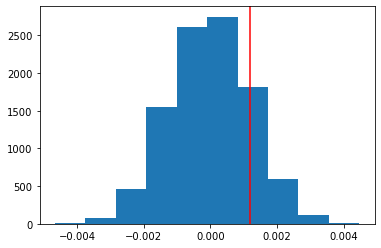

In [60]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(x=diffs_convertion, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [61]:
#create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

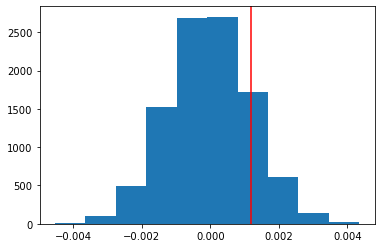

In [62]:
#plot null distribution
plt.hist(null_vals);

#plot line for observed statistic
plt.axvline(x=diffs_convertion, color='red')

In [63]:
#compute p-value
(null_vals>diffs_convertion).mean()

0.1583

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**I created a distribution under the null hypothesis and then computed the P-Value, that is the probability of observing your statistic if the null hypothesis is true.  Since our P-value (0.158) is larger than the Type I error, 0.05, we fail to reject the null. Our null suggested that the old and new page have a similar result, and there is no significant difference between the conversion rate of both. After this testing, we have no evidence that the new page have more conversion rate. We keep having the Null as the correct hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [71]:
import statsmodels.api as sm

converted_old = len(df2[df2.landing_page == 'old_page'][df2.converted == 1])
converted_new = len(df2[df2.landing_page == 'new_page'][df2.converted == 1])
n_old = len(df2[df2.landing_page == 'old_page'])
n_new = len(df2[df2.landing_page == 'new_page'])

<ipython-input-71-e28b0040c16f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  converted_old = len(df2[df2.landing_page == 'old_page'][df2.converted == 1])
<ipython-input-71-e28b0040c16f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  converted_new = len(df2[df2.landing_page == 'new_page'][df2.converted == 1])


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [72]:
# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest(count=[converted_new, converted_old], nobs=[n_new, n_old])
print(z_score, p_value)

-1.3116075339133115 0.18965258971881804


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z score is also called standard score. This score helps to understand if a data value is greater or smaller than the mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean [(source here)](https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/#:~:text=Z%20score%20is%20also%20called,x%20%2Dmean). Since our Z-score does not exceed the critical value of 1.96 we can not reject the null hypothesis**

**For the P-Value, again is greater than the Type I error, (P_value = 0.1896), so it suggests that the null hypothesis is true and the 2 pages have the same conversion rate, or similar.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I will use Logistic Regression, since is a regression aporoach used to predict only two possible outcomes. For that I will use statsmodels in order to calculate it.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [73]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


In [74]:
df2['intercept']= 1
df2[['ab_page','old_page']]=pd.get_dummies(df2['group'])
df2=df2.drop('old_page', axis=1)

In [75]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [76]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [77]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:               8.085e-06
Time:                        12:51:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The P-value associated with ab_page is 0,19, very similar to the one we obtained in part II (0.18). In both part we failed to reject the null hypothesis, them. The hypothesis in both test are different anyway, since in Part II our hypothesis was using the ≤ in the Ho and the > in the H1, so a one tailed test, while in the Linear Regression (Part III) we are just testing if the Ho is = and in the H1 we are testing if H1 is ≠, doesn't matter in wich direction, so a two tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Since we just looked the correlation of conversion rate with one variable, the group they were in (so the page they landed, that is always the same for each group), another variables could give us more accuracy predicting the conversion rate. Maybe the time of the day, the day of the week, etc. But we need to be sure, if we add more variables, that there are no strong relation between them(be sure multicollinearity do not occurs).**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [78]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0


In [79]:
### Create the necessary dummy variables

In [80]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [81]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,0,0,1


In [82]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:               2.324e-05
Time:                        12:51:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.561      0.000      -2.022      -1.987
ab_page        0.0150      0.011      1.308      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
==============================================================================
"""

**We can see that the P-values for each country is still greater than 0.05, our Type I error. So we can not reject our Null hypothesis based on countries either** 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [83]:
### I will create an interaction between the country and the ab_page:

df_new['CA_new_page']=df_new['ab_page']*df_new['CA']
df_new['UK_new_page']=df_new['ab_page']*df_new['UK']

In [84]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_new_page,UK_new_page
user_id,,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,0,0,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,0,0,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,0,0,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,0,0,1,0,0


In [85]:
log_mod3= sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK','CA_new_page','UK_new_page']])
results3=log_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:               3.483e-05
Time:                        12:51:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0071      0.010   -207.047      0.000      -2.026      -1.988
ab_page         0.0206      0.014      1.506      0.132      -0.006       0.047
CA             -0.0644      0.038     -1.678      0.093      -0.140       0.011
UK              0.0257      0.019      1.364      0.173      -0.011       0.063
CA_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_new_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
===============================================================================
"""

In [86]:
#exponentiated the coef in order to interpret them:
1/np.exp(0.0206),np.exp(-0.0644), np.exp(0.0257),np.exp(0.0469),np.exp(-0.0314)

(0.9796107305032505,
 0.9376298725613128,
 1.0260330923696246,
 1.048017202119183,
 0.9690878603945013)

**Again, all the P-values are greater than the Type I error, so even the interaction of countries and ab_page are not significant. We cannot reject the Null hypothesis based on that. We need to suggest that keeping the old page is the best option**

<a id='conclusions'></a>
## Conclusions

In this project I worked to understand the results of an A/B test run by an e-commerce website. My goal was to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

First we did an analysis based on **probability**, in which our conclusion was that the new page lead to fewer conversions, but considering that the difference between both pages is not significant.

After that, we realized an **A/B testing**. I set the  hypothesis as:
$$H_o: P𝑛𝑒𝑤  - P𝑜𝑙𝑑 ≤0$$
$$H_o: P𝑛𝑒𝑤  - P𝑜𝑙𝑑 >0$$

and running the necessary analysis, I created a distribution under the null hypothesis and then computed the P-Value.  Since our P-value (0.158) is larger than the Type I error, 0.05, we fail to reject the null. Our null suggested that the old and new page have a similar result, and there is no significant difference between the conversion rate of both. After this testing, we still have no evidence that the new page have more conversion rate. We keep having the Null as the correct hypothesis.

I also used stats.proportions_ztest to compute my test statistic and p-value, but concluded that  the P-Value, again is greater than the Type I error, (P_value = 0.1896), suggesting the same as before.

Finnaly I used  **statsmodels** to fit the **linear regression** model. My conclusion using this method was that the P-value associated with ab_page is 0,19, very similar to the one we obtained in part II (0.18). In both part we failed to reject the null hypothesis, then. The hypothesis in both test are different anyway, since in Part II our hypothesis was using the ≤ in the Ho and the > in the H1, so a one-tailed test, while in the Linear Regression (Part III) we are just testing if the Ho is = and in the H1 we are testing if H1 is ≠, doesn't matter in which direction, so a two-tailed test.


Since we just looked the correlation of conversion rate with one variable, using another variables could give us more accuracy predicting the conversion rate. We decided to add the country where the page is being visited, to see if the correlation changes. I observed that the P-values for each country is still greater than 0.05, our Type I error. So we can not reject our Null hypothesis based on countries either. Even if we create an interaction between ab_page and the country, all the P-values are greater than the Type I error, so even the interaction  are not significant.

**We cannot reject the Null hypothesis based on all the analysis we did**. So I  to suggest that keeping the old page is the best option. We could also increment the amount of time we implement the test, or try to add new variables to the analysis that could suggest a better performance in the new web page.  

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.